<a href="https://colab.research.google.com/github/EltonGS/Bootcamp-Data-Science-Alura/blob/main/Bootcamp_Alura_Md1_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 1 do Bootcamp de Data Science Aplicada da Alura
## Aula 3 - Manipulação de dados

## Neste módulo serão utilizados dados do Sistema Único de Saúde (**SUS**) que são disponibilizados através da plataforma **DATASUS**.

## Os dados extraídos são referentes aos gastos realizados por unidades da federação (estados e Distrito Federal) a partir de Janeiro de 2008 até Março de 2021.

## Utilizando o **Google Colab**, **Python** e a biblioteca **Pandas** os dados serão tratados para serem lidos corretamente. Gráficos serão criados utilizando a biblioteca **matplotlib** para simplificar a visualização e entendimento das informações.

In [1]:
# importando as bibliotecas Pandas e matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


#encoding é usado para informar a padronização utilizada no arquivo
# thousands e decimal são utilizados para indicar qual o separador de milhar e casas decimais usado no arquivo
dados_atd = pd.read_csv('/content/atendimento.csv', encoding='ISO-8859-1', skiprows = 3, sep=';',
                    skipfooter = 12, thousands = '.', decimal = ',') 

dados_atd.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [2]:
colunas_usaveis = dados_atd.mean().index.tolist() 
colunas_usaveis.insert(0, 'Unidade da Federação')
usaveis = dados_atd[colunas_usaveis]
usaveis = usaveis.set_index('Unidade da Federação')
usaveis = usaveis.drop(['Total', '2021/Jan', '2021/Fev', '2021/Mar'], axis = 1) 
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2737677.78,2693726.29,26

In [3]:
# Para ver um index organizado em um lista com os nomes das colunas
usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [4]:
# Verificar do segundo ao quarto item da lista (começa no 0 e o segundo item informado não é incluso na seleção)
usaveis.T.columns[1:4]

Index(['12 Acre', '13 Amazonas', '14 Roraima'], dtype='object', name='Unidade da Federação')

In [5]:
# é opcional informar o 0 no primeiro item
usaveis.T.columns[:5] 

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [6]:
# sem transpor a tabela podemos pegar os itens diretamente do index
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [7]:
# podemos dizer diretamente que queremos os 5 primeiros itens de um dataframe ou series
usaveis[:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2737677.78,2693726.29,26

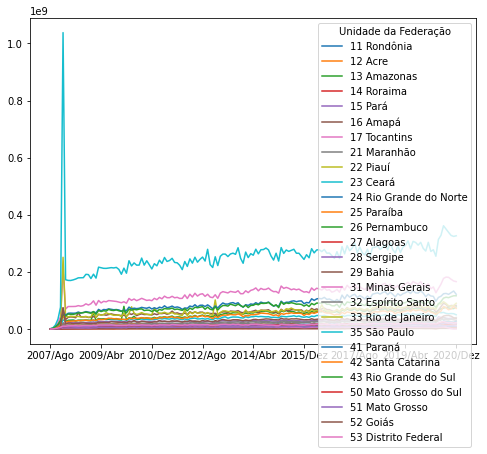

In [8]:
usaveis.T.plot(figsize = (8,6))

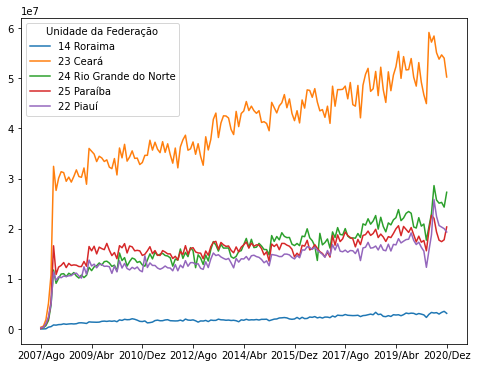

In [9]:
# buscando uma amostra aleatória no dataframe com a função sample onde dizemos quantos itens serão buscados
usaveis.sample(n=5).T.plot(figsize=(8,6))

In [10]:
# Para gerar valores aleatórios é utilizado uma seed. Para ter valores repetidos essa seed pode ser definida
# através da biblioteca numpy
import numpy as np
np.random.seed(687942)

usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,1.621211e+07,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,1.449030e+07,14203837.61,15160988.21,14348102.03,1.519860e+07,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,1.687568e+07,1.518414e+07,1.591326e+07,15189197.44,1.592950e+07,1.700099e+07,1.605530e+07,1.676368e+07,1.648738e+07,...,2.533631e+07,2.687584e+07,2.525766e+07,2.427612e+07,2.548025e+07,2.268667e+07,2.526673e+07,2.597511e+07,2.744456e+07,2.444462e+07,2.571680e+07,2.549852e+07,2.433823e+07,2.615885e+07,2.467166e+07,2.468369e+07,2.520104e+07,2.471017e+07,2.674073e+07,2.598330e+07,2.869092e+07,2.593689e+07,2.855051e+07,2.931826e+07,2.751913e+07,2.978889e+07,2.629417e+07,2.525092e+07,2.761560e+07,2.660145e+07,2.668990e+07,2.400305e+07,2.929076e+07,3.195820e+07,4.193110e+07,3.640526e+07,3.449113e+07,3.480054e+07,3.570873e+07,4.050091e+07
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,1.002586e+08,91831325.37,97289703.07,95723396.53,1.000500e+08,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,1.073899e+08,1.008360e+08,1.054946e+08,99666115.96,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.422941e+08,1.483272e+08,1.423239e+08,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,1.176390e+07,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10260681.64,10721328.37,1.229823e+07,11640067.28,12397524.20,12629319.37,1.317428e+07,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,1.516214e+07,1.364932e+07,1.424202e+07,12551831.85,1.347031e+07,1.415698e+07,1.394087e+07,1.327206e+07,1.347311e+07,...,1.853126e+07,1.812258e+07,1.816946e+07,1.811826e+07,1.904547e+07,1.825403e+07,2.097219e+07,2.071743e+07,2.199186e+07,2.090981e+07,2.154486e+07,2.263433e+07,1.992634e+07,2.229082e+07,2.044527e+07,1.938268e+07,2.116138e+07,2.077093e+07,2.177521e+07,2.220658e+07,2.381943e+07,2.161357e+07,2.213746e+07,2.307354e+07,2.343898e+07,2.308621e+07,2.035475e+07,2.014024e+07,2.220506e+07,2.051814e+07,2.093990e+07,1.772207e+07,2.043029e+07,2.302775e+07,2.860810e+07,2.572134e+07,2.509860e+07,2.525799e+07,2.431293e+07,2.727782e+07
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5.136475e+06,5051932.07,52001

In [11]:
# Somando todos os valores das linhas e podemos atribuir isso em uma nova coluna, aqui chamada TOTAL
# Para fazer isso é necessário que a serie tenha o mesmo número de linhas que o dataframe

usaveis['Total'] =  usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,9.772241e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,4.436316e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,1.872328e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2693726.29,2671451.53,

In [12]:
# Para ordenar/organizar o dataframe com base em uma coluna o parâmetro sort é usado

ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis = 1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,...,2.673549e+08,2.874357e+08,2.672620e+08,2.596379e+08,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.422941e+08,1.483272e+08,1.423239e+08,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,...,1.107208e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08
43 Rio Grande do Sul,10492

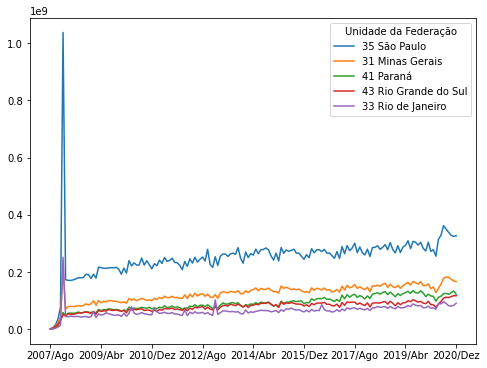

In [13]:
# criando um gráfico usando os 5 primeiros itens, os que mais gastaram, transpostos

ordenado_por_total.head(5).T.plot(figsize = (8,6))

In [14]:
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,...,2.673549e+08,2.874357e+08,2.672620e+08,2.596379e+08,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.422941e+08,1.483272e+08,1.423239e+08,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,...,1.107208e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08
43 Rio Grande do Sul,10492

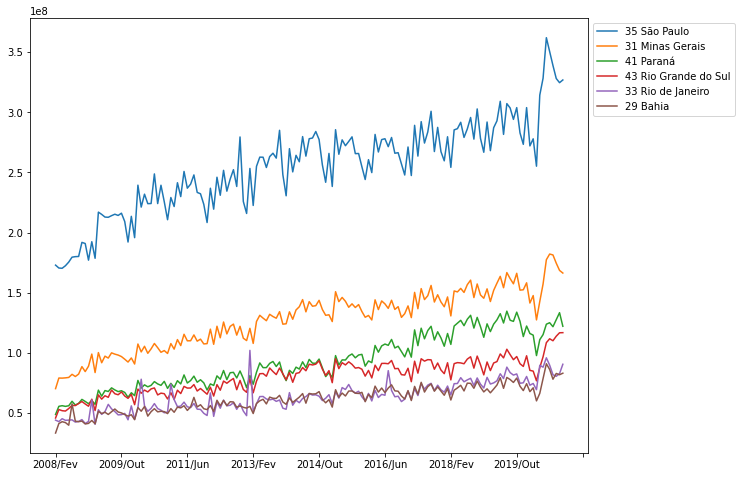

In [15]:
# Na coluna 2008/Jan vemos um valor muito acima do padrão para os estados, isso traz uma distorção na visualização dos dados
# selecionando o nome das colunas a partir de 2008/Jan
colunas_interessadas = ordenado_por_total.columns[6:]

# atribuindo o valor do dataframe informando as colunas a partir de 2008/Jan
ordenado_por_total = ordenado_por_total[colunas_interessadas]

ordenado_por_total.head(6).T.plot(figsize = (10,8))
plt.legend(bbox_to_anchor=(1,1))

# Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

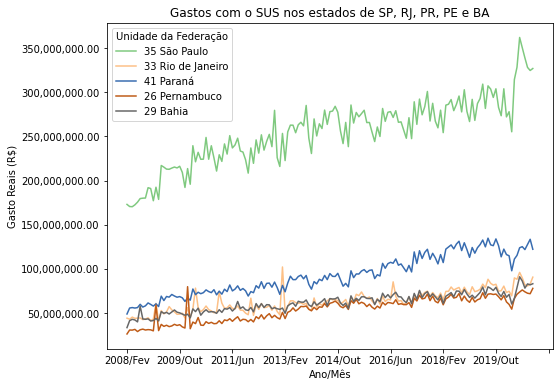

In [18]:
# alterando a paleta de cores com o comando cmap=plt.get_cmap('')

estados_desafio_2 = ordenado_por_total.loc[['35 São Paulo', '33 Rio de Janeiro', '41 Paraná', '26 Pernambuco', '29 Bahia']]
ax = estados_desafio_2.T.plot(xlabel = ('Ano/Mês'), ylabel=('Gasto Reais (R$)'), figsize = (8,6), title=('Gastos com o SUS nos estados de SP, RJ, PR, PE e BA'),
                              cmap=plt.get_cmap('Accent'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

# Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [19]:
# criando uma nova série sem dados
regiao = []

# o For verifica o index do dataframe ordenado por gastos totais
# os IF verificam qual o primeiro caracter do index, assim utilizando a categorização já presente no documento
# o comando o append é utilizado no dataframe vazio que criamos anteriormente assim criando uma series com a informação da região dos estados
for estado in ordenado_por_total.index:
  if estado.startswith('1'):
    regiao.append('Norte')
  elif estado.startswith('2'):
    regiao.append('Nordeste')
  elif estado.startswith('3'):
    regiao.append('Sudeste')
  elif estado.startswith('4'):
    regiao.append('Sul')
  else:
    regiao.append('Centro Oeste')

# mostrando a informação que temos na Series regiao
regiao

['Sudeste',
 'Sudeste',
 'Sul',
 'Sul',
 'Sudeste',
 'Nordeste',
 'Nordeste',
 'Sul',
 'Nordeste',
 'Centro Oeste',
 'Norte',
 'Nordeste',
 'Sudeste',
 'Nordeste',
 'Nordeste',
 'Centro Oeste',
 'Centro Oeste',
 'Nordeste',
 'Nordeste',
 'Centro Oeste',
 'Norte',
 'Nordeste',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte']

In [20]:
# inserindo a informação obtida na célula anterior no dataframe ordenado por gastos
# a informação será inserida na posição 0, com o nome da coluna sendo Região, utilizando os dados que estão na variável regiao
ordenado_por_total.insert(0, 'Região', regiao)
ordenado_por_total.head()

,Região,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,2.107109e+08,2.291469e+08,2.216600e+08,2.414456e+08,2.299206e+08,...,2.673549e+08,2.874357e+08,2.672620e+08,2.596379e+08,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08
31 Minas Gerais,Sudeste,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077661e+08,1.031494e+08,1.110771e+08,1.060943e+08,...,1.422941e+08,1.483272e+08,1.423239e+08,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08
41 Paraná,Sul,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,...,1.107208e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08
43 Rio Grande do Sul,Su

# Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

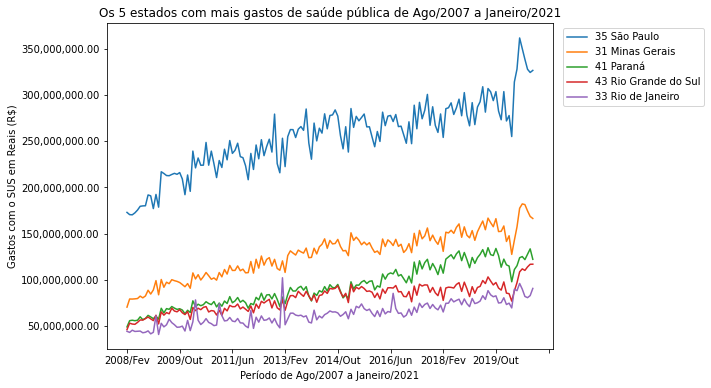

In [25]:
# retirando a coluna região do dataframe ordenado_por_total
ordenado_por_total_sem_regiao = ordenado_por_total.drop('Região', axis= 1)

ax5 = ordenado_por_total_sem_regiao.head(5).T.plot(figsize = (8,6), xlabel=('Período de Ago/2007 a Janeiro/2021'),
                                        ylabel=('Gastos com o SUS em Reais (R$)'))
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax5.set_title('Os 5 estados com mais gastos de saúde pública de Ago/2007 a Janeiro/2021')
plt.legend(bbox_to_anchor=(1.35, 1))

In [26]:
ordenado_por_total_sem_regiao.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,2.107109e+08,2.291469e+08,2.216600e+08,2.414456e+08,2.299206e+08,2.508174e+08,...,2.673549e+08,2.874357e+08,2.672620e+08,2.596379e+08,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077661e+08,1.031494e+08,1.110771e+08,1.060943e+08,1.154872e+08,...,1.422941e+08,1.483272e+08,1.423239e+08,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.107208e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08
43

# Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

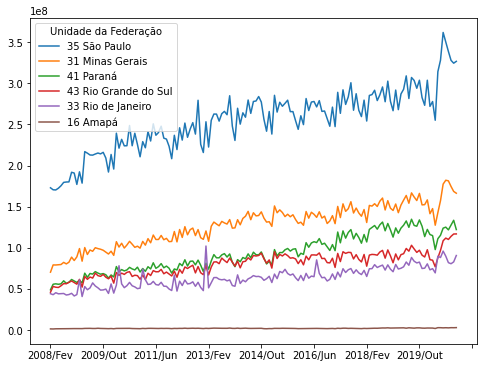

In [27]:
# meu estado é SP e já estava no gráfico, Amapá foi adicionado
# variável criada com os 5 estados que mais gastaram
cinco_gastoes = ordenado_por_total_sem_regiao.head(5) 

# variável criada com o resultado do Amapá, buscando nos dados ordenados por gasto
amapa = ordenado_por_total_sem_regiao.loc['16 Amapá'] 

# variável criada adicionando os dados do Amapa aos 5 que mais gastaram
cinco_gastoes_amapa = cinco_gastoes.append(amapa) 

cinco_gastoes_amapa.T.plot(figsize = (8, 6))

# Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

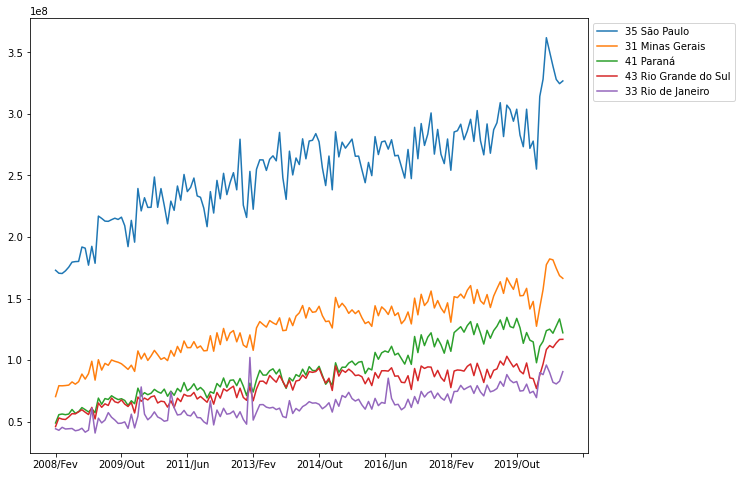

In [28]:
# No gráfico abaixo podemos identificar um pico no estado do RJ e SP por meados de 2012/2013
# E outro pico por volta de 2015/2016

ordenado_por_total_sem_regiao.head(5).T.plot(figsize = (10, 8))
plt.legend(bbox_to_anchor = (1,1))

## Como é possível ver nas notícias abaixos, tivemos sim surtos de dengue em 2013 e 2016.

[Surto de Dengue em 2013](http://g1.globo.com/bemestar/noticia/2013/02/casos-de-dengue-no-pais-aumentam-190-no-comeco-de-2013-diz-governo.html)

[Surto de Dengue em 2016](http://g1.globo.com/bemestar/noticia/2016/04/brasil-teve-802-mil-casos-de-dengue-e-91-mil-de-zika-em-2016-diz-boletim.html#:~:text=O%20Brasil%20j%C3%A1%20registrou%20802.249,prov%C3%A1veis%20da%20doen%C3%A7a%20neste%20ano.)

# Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

In [29]:
# verificando os dados na coluna Região
ordenado_por_total['Região']

Unidade da Federação
35 São Paulo                   Sudeste
31 Minas Gerais                Sudeste
41 Paraná                          Sul
43 Rio Grande do Sul               Sul
33 Rio de Janeiro              Sudeste
29 Bahia                      Nordeste
26 Pernambuco                 Nordeste
42 Santa Catarina                  Sul
23 Ceará                      Nordeste
52 Goiás                  Centro Oeste
15 Pará                          Norte
21 Maranhão                   Nordeste
32 Espírito Santo              Sudeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
53 Distrito Federal       Centro Oeste
50 Mato Grosso do Sul     Centro Oeste
22 Piauí                      Nordeste
27 Alagoas                    Nordeste
51 Mato Grosso            Centro Oeste
13 Amazonas                      Norte
28 Sergipe                    Nordeste
17 Tocantins                     Norte
11 Rondônia                      Norte
12 Acre                          Norte
14 R

In [31]:
# selecionando as linhas com as informações dos estados da região sudeste
sudeste = ordenado_por_total.loc[['31 Minas Gerais', '35 São Paulo', '33 Rio de Janeiro', '32 Espírito Santo']]

# retirando a coluna região
sudeste_sem_regiao = sudeste.columns[1:]
sudeste = sudeste[sudeste_sem_regiao]
sudeste

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077661e+08,1.031494e+08,1.110771e+08,1.060943e+08,1.154872e+08,...,1.422941e+08,1.483272e+08,1.423239e+08,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08
35 São Paulo,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,2.107109e+08,2.291469e+08,2.216600e+08,2.414456e+08,2.299206e+08,2.508174e+08,...,2.673549e+08,2.874357e+08,2.672620e+08,2.596379e+08,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08
33 Rio de Janeiro,4.412816e+07,4.290085e+07,4.530650e+07,4.395135e+07,4.411111e+07,4.435906e+07,4.250083e+07,4.306646e+07,4.455331e+07,4.135151e+07,4.302476e+07,6.088546e+07,4.066838e+07,5.275354e+07,4.891668e+07,5.117740e+07,5.724194e+07,5.348566e+07,5.124409e+07,4.848948e+07,4.868907e+07,4.970837e+07,4.441342e+07,5.599371e+07,4.483335e+07,5.447324e+07,7.812863e+07,5.602888e+07,5.143583e+07,5.387391e+07,5.786729e+07,5.373602e+07,5.237934e+07,5.024253e+07,5.089133e+07,7.400562e+07,6.114923e+07,5.534790e+07,5.581691e+07,5.908654e+07,...,6.880186e+07,7.316533e+07,6.936536e+07,6.737880e+07,7.245304e+07,6.506033e+07,7.442874e+07,7.457918e+07,7.941904e+07,7.599176e+07,7.757601e+07,7.891690e+07,7.286942e+07,7.918840e+07,7.401840e+07,7.083151e+07,7.966333e+07,7.414288e+07,7.506315e+07,7.685958e+07,8.267099e+07,7.868923e+07,8.818241e+07,8.362411e+07,8.156194e+07,8.253468e+07,7.477847e+07,7.514907e+07,8.041186e+07,7.314721e+07,7.459599e+07,6.943794e+07,8.972528e+07,8.813569e+07,9.594114e+07,8.979547e+07,8.188669e+07,8.057024e+07,8.280731e+07,9.05673

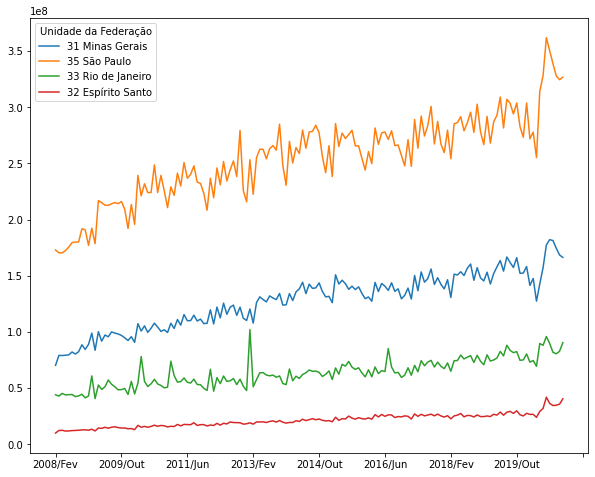

In [32]:
# plotando o gráfico com os estados da região sudeste
sudeste.T.plot(figsize = (10, 8))

#### No gráfico acima vemos picos de gastos nos estados do **Rio de Janeiro** e **São Paulo** nos final de 2012 / início de 2013. O mesmo não acontece nos estados de Minas Gerais e Espírito Santo. Nesses períodos já verificamos que um surto de dengue aconteceu no Brasil, com base no gráfico podemos assumir que os estados de SP e RJ foram os mais impactados por esse surto de dengue.

#### No estado do **Rio de Janeiro** também vemos um pico em meados de 2016, período em que ocorreu outro surte de dengue no Brasil e, aparentemente, o estado do RJ foi o mais afetado da região sudeste.

# Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

In [33]:
# Adicionando o estado do Amapá aos dados da região Sudeste para comparação
# A variável amapa foi definida anteriormente
sudeste_com_amapa = sudeste.append(amapa)
sudeste_com_amapa

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077661e+08,1.031494e+08,1.110771e+08,1.060943e+08,1.154872e+08,...,1.422941e+08,1.483272e+08,1.423239e+08,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08
35 São Paulo,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,2.107109e+08,2.291469e+08,2.216600e+08,2.414456e+08,2.299206e+08,2.508174e+08,...,2.673549e+08,2.874357e+08,2.672620e+08,2.596379e+08,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08
33 Rio de Janeiro,4.412816e+07,4.290085e+07,4.530650e+07,4.395135e+07,4.411111e+07,4.435906e+07,4.250083e+07,4.306646e+07,4.455331e+07,4.135151e+07,4.302476e+07,6.088546e+07,4.066838e+07,5.275354e+07,4.891668e+07,5.117740e+07,5.724194e+07,5.348566e+07,5.124409e+07,4.848948e+07,4.868907e+07,4.970837e+07,4.441342e+07,5.599371e+07,4.483335e+07,5.447324e+07,7.812863e+07,5.602888e+07,5.143583e+07,5.387391e+07,5.786729e+07,5.373602e+07,5.237934e+07,5.024253e+07,5.089133e+07,7.400562e+07,6.114923e+07,5.534790e+07,5.581691e+07,5.908654e+07,...,6.880186e+07,7.316533e+07,6.936536e+07,6.737880e+07,7.245304e+07,6.506033e+07,7.442874e+07,7.457918e+07,7.941904e+07,7.599176e+07,7.757601e+07,7.891690e+07,7.286942e+07,7.918840e+07,7.401840e+07,7.083151e+07,7.966333e+07,7.414288e+07,7.506315e+07,7.685958e+07,8.267099e+07,7.868923e+07,8.818241e+07,8.362411e+07,8.156194e+07,8.253468e+07,7.477847e+07,7.514907e+07,8.041186e+07,7.314721e+07,7.459599e+07,6.943794e+07,8.972528e+07,8.813569e+07,9.594114e+07,8.979547e+07,8.188669e+07,8.057024e+07,8.280731e+07,9.05673

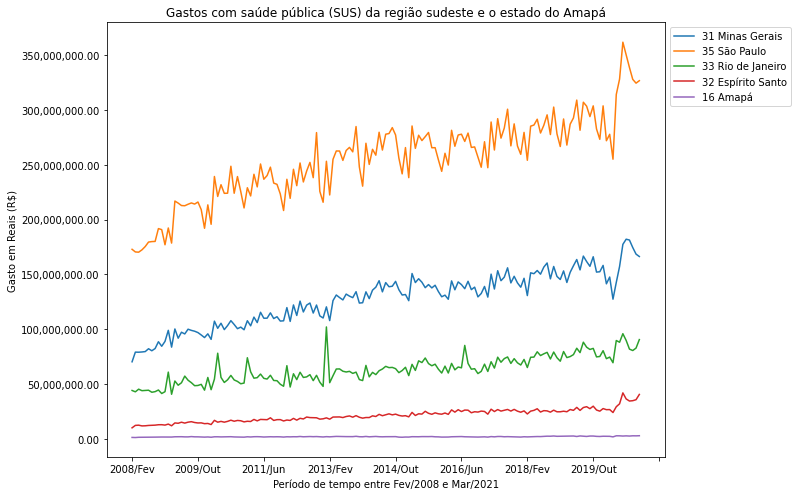

In [34]:
# Gráfico plotado com as informações da região sudeste com o estado do Amapá

ax_sudeste = sudeste_com_amapa.T.plot(figsize = (10, 8))
ax_sudeste.set_ylabel('Gasto em Reais (R$)')
ax_sudeste.set_xlabel('Período de tempo entre Fev/2008 e Mar/2021')
ax_sudeste.set_title('Gastos com saúde pública (SUS) da região sudeste e o estado do Amapá')
ax_sudeste.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax_sudeste.legend(bbox_to_anchor = (1,1))
plt.show()